# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [63]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as stats
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\fando\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


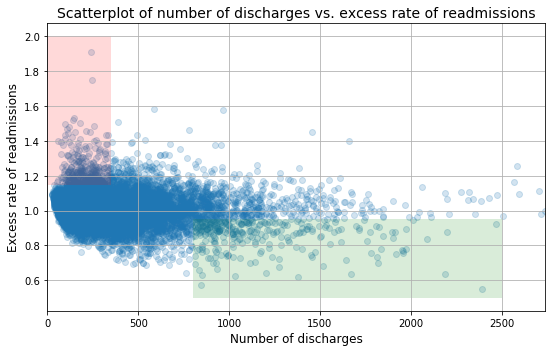

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

# A. Do you agree with the above analysis and recommendations? Why or why not?

The analysis above wanted to make the argument that there is a negative relation between number of discharges and excess readmission ratio, that is, the higher the number of discharges, the lower the rate of readmission. However, other than reporting mean readmission rate of groups of different number of discharges and making a general scatter plot, the analysis failed to provide any statistical evidence to support its point. Below, we will examine its argument in a statistical-sound manner.

**Regarding the Scatter Plot:** the scatter plot above tries to show the negative relation between number of discharges and excess readmission. However, the negative trend is not very clear since the points are all over the place. Scatter plot is the most intuitive way to show correlation, however, it can be confusing if the pattern is small and indiscernible by eyeballing. Adding a trendline or using another type of plot that clearly shows the distribution (for example, the box plot below) would be better. 

# B. Examine the Argument: Negative Relation between Number of Discharges and Excess Readmission Ratio

In [18]:
clean_hospital_read_df = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'].isnull() == False]

In [19]:
clean_hospital_read_df.shape

(11497, 12)

**First**, we separate Number of Discharges into 2 groups: Excess Readmission and Non-Excess Readmission and do some exploratory analysis.

In [21]:
num_dischar_excess = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'] > 1]['Number of Discharges']
num_dischar_nonexcess = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'] <= 1]['Number of Discharges']

In [56]:
print("The average number of discharges for Excess Readmission group is", num_dischar_excess.mean())

The average number of discharges for Excess Readmission group is 350.6526351237582


In [57]:
print("The average number of discharges for Non-Excess Readmission group is", num_dischar_nonexcess.mean())

The average number of discharges for Non-Excess Readmission group is 381.2952500899604


Text(0.5,1,'Distribution of # of Discharges, Excess Readmission vs. Non-Excess Readmission')

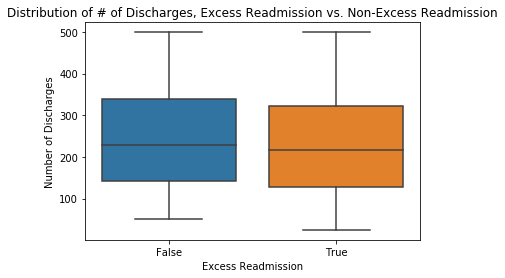

In [71]:
sns.boxplot(x = 'Excess Readmission', y = 'Number of Discharges', data = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 500])
plt.title('Distribution of # of Discharges, Excess Readmission vs. Non-Excess Readmission')

Comparing the mean and distribution plot of the two groups, Non-Excess Readmission group appears to have higher number of discharges, which is in line with previous analysis' argument. 

**Second**, let's verify this argument with Two-Sample t-test.

In [22]:
stats.ttest_ind(num_dischar_excess, num_dischar_nonexcess)

Ttest_indResult(statistic=-5.324171154200959, pvalue=1.0332472818989955e-07)

The null hypothesis of the test is that the average number of discharges of the excess readmission group equals to that of the non-excess readmission group. Based on the test result, we reject the null at 99% significance level and conclude that the excess readmission group's average is smaller than the non-excess group, which coincides with the argument made in the previous analysis.

However, let's not forget the difference between **statistical significance** and **practical significance**.

Statistically significant difference can be found easily, regardless of its magnitude, if the sample is large enough. With a sample size of 11.5k (which is quite large), we are likely to fall into this trap. Thus, it is necessary to check the **practical significance** of our test, that is, are the differences between the two samples big enough to have real meaning. Based on the following formula, we use Cohen's d to check for our test's effect size.

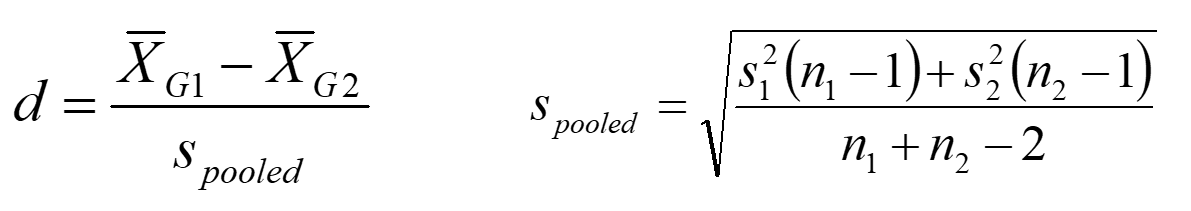

In [58]:
# Cohen's d, formula
from IPython.display import Image
Image(filename="practical significance.png", width = 400)

In [38]:
s1 = num_dischar_excess.std()
s2 = num_dischar_nonexcess.std()
n1 = len(num_dischar_excess)
n2 = len(num_dischar_nonexcess)

In [50]:
s_pool = math.sqrt((s1**2*(n1-1) + s2**2*(n2-1))/(n1+n2-2))

In [59]:
d = (num_dischar_nonexcess.mean() - num_dischar_excess.mean())/s_pool

In [60]:
print('The effect size of our test is', d)

The effect size of our test is 0.09936383384994714


The effect size is 0.1, which indicates a relatively small effect (Interpretation of d: 0.2: small effect, 0.5: medium effect, 0.8: large effect). Now, regarding the previous analysis, we can safely conclude that **number of discharges of those with excess readmission is significantly lower than those without excess readmission, however, the difference is trivial.**

## Recommendation

While the correlation between number of discharges and excess readmission rate holds, for most hospitals, the small effect size may not justify the cost to upgrade resource allocation or consolidate hospitals and facilities. We should gather more data and test readmission rate's correlation with other factors. These regulatory policies are only recommended if no other significant and effective correlations are found. 